# Desafio Final
## Modelos de Classificação e Regressão Logística


1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn iris = datasets.load_iris()):<br>
<b>Responda:</b><br>
a. Faça uma análise inicial sobre esse dataset<br>
b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.<br>
c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?<br>
d. Aplique a regressão logística para avaliar o modelo de classificação.<br>
e. Calcule a acurácia, precisão e recall.<br>
f. Plote a matriz de confusao com matplotlib ou seaborn<br>
<hr>

2. Utilizando o dataset load_digits. Exemplo de como fazer a importação do dataset usando o sklearn:<br>

    from sklearn.datasets import load_digits<br>
    digits = load_digits()

<b>Responda:</b><br>
* Faça uma análise inicial sobre esse dataset<br>
    i. Quantos dados possui?<br>
    ii. Existem dados nulos? Se sim quantos?<br>
    iii. Todos são dados numéricos ou existem colunas com dados categóricos?<br>
    
* Aplique a regressão logística para avaliar o modelo de classificação.<br>
    c. Calcule a acurácia, precisão e recall.<br>
    d. Plote a matriz de confusão com matplotlib ou seaborn<br>
    e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de
    0-9 que são disponibilizados neste dataset.<br>
    f. Calcule a acurácia, precisão e recall.<br>
    g. Plote a matriz de confusao com matplotlib ou seaborn<br>

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [5]:
iris = pd.read_csv("iris.csv")
iris.head(4)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


#### Initial analysis

In [21]:
print("\033[1mDatasent Rows:\033[0m\n{}\n\033[1mDataset Columns:\033[0m\n{}".format(iris.shape[0],iris.shape[1])) ; print("-"*40)
print("\033[1mDtypes:\033[0m\n{}".format(iris.dtypes)) ; print("-"*40)
print("\033[1mNull values:\033[0m\n{}".format(iris.isnull().sum()))  ; print("-"*40)
print("\033[1mUnique values:\033[0m\n{}".format(iris.nunique())) ; print("-"*40)
print("\033[1mDuplicate values: \033[0m") ; print(iris.duplicated().sum())

Datasent Rows:
150
Dataset Columns:
5
----------------------------------------
Dtypes:
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object
----------------------------------------
Null values:
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64
----------------------------------------
Unique values:
Sepal_Length    35
Sepal_Width     23
Petal_Length    43
Petal_Width     22
Species          3
dtype: int64
----------------------------------------
Duplicate values: 
1


In [51]:
print("\033[1mCategorical Analysis:\033[0m\n")
print(iris.describe(include="object")) ; print("-"*40)
print("\033[1mNumber of records by species:\033[0m\n{}".format(iris.Species.value_counts()))

Categorical Analysis:

       Species
count      150
unique       3
top     setosa
freq        50
----------------------------------------
Number of records by species:
setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64


In [49]:
print("\033[1mNumeric Analysis:\033[0m\n")
display(iris.describe()) ; print("-"*40)
print("\033[1mAnalysis of averages by species\033[0m\n")
display(iris.groupby("Species")[["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width"]].agg([np.mean]))

Numeric Analysis:



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


----------------------------------------
Analysis of averages by species



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
,mean,mean,mean,mean
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<b><span style="color:purple">Conclusions</span></b>


* The minimum values and maximum values may suggest the presence of outliers. 

* <span style="color:pink">Setosa</span>: Characterized by shorter Sepal_Length, wider Sepal_Width, and significantly shorter Petal_Length and Petal_Width.

* <span style="color:green">Versicolor</span>: Has intermediate Sepal_Length and Petal_Length values, with the narrowest Sepal_Width and moderate Petal_Width.

* <span style="color:blue">Virginica</span>: Notable for having the longest Sepal_Length and Petal_Length, with intermediate Sepal_Width and the widest Petal_Width.

The means of Sepal_Length, Sepal_Width, Petal_Length, and Petal_Width across the three species show clear differences, making these features useful for distinguishing between setosa, versicolor, and virginica. The Petal dimensions (length and width) especially provide strong distinguishing characteristics due to their significant variation among the species.

#### Data visualization

In [89]:
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

Text(0.5, 1.0, 'Number of species')

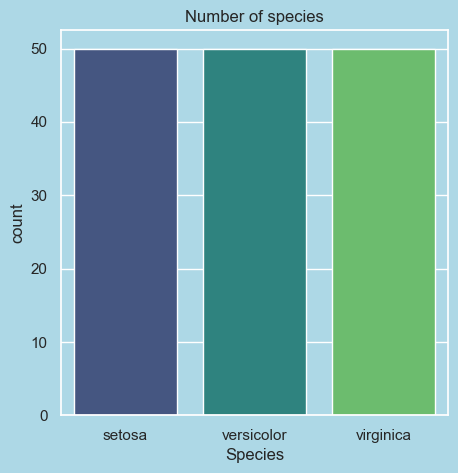

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(iris, x="Species",palette="viridis")
plt.title("Number of species")

Text(0.5, 1.0, 'Sepal_Width x Specie')

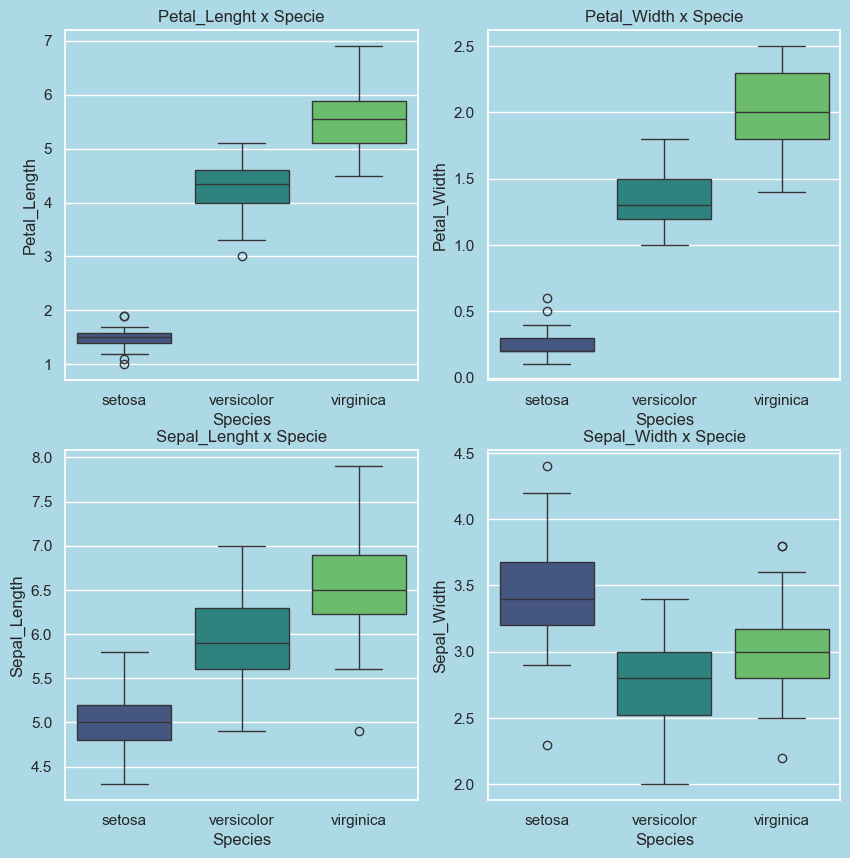

In [103]:
figsize, ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(iris,x='Species',y='Petal_Length',hue='Species',ax=ax[0,0], palette='viridis')
ax[0,0].set_title("Petal_Lenght x Specie")
sns.boxplot(iris,x='Species',y='Petal_Width',ax=ax[0,1], palette='viridis')
ax[0,1].set_title("Petal_Width x Specie")
sns.boxplot(iris,x='Species',y='Sepal_Length',hue='Species',ax=ax[1,0], palette='viridis')
ax[1,0].set_title("Sepal_Lenght x Specie")
sns.boxplot(iris,x='Species',y='Sepal_Width',hue='Species',ax=ax[1,1], palette='viridis')
ax[1,1].set_title("Sepal_Width x Specie")

Text(0.5, 1.0, 'Petal_Width x Specie')

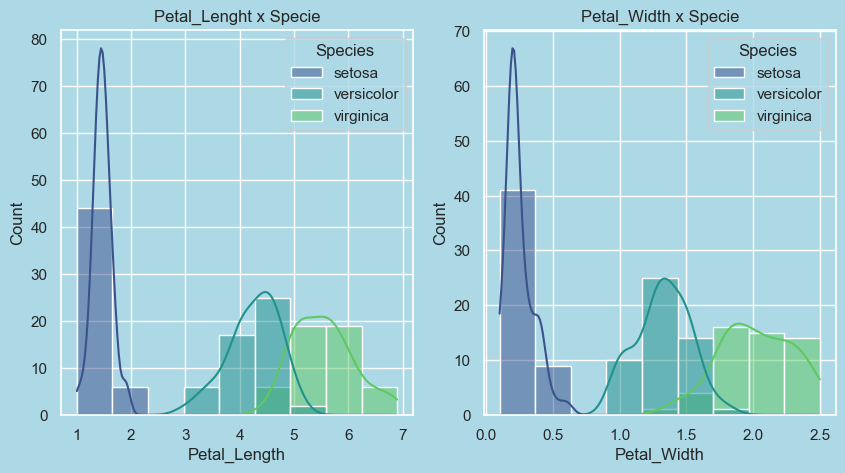

In [107]:
figsize, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(iris,x='Petal_Length',hue='Species',ax=ax[0], palette='viridis',kde=True)
ax[0].set_title("Petal_Lenght x Specie")
sns.histplot(iris,x='Petal_Width', hue='Species',ax=ax[1], palette='viridis',kde=True)
ax[1].set_title("Petal_Width x Specie")

Text(0.5, 1.0, 'Sepal Width x Sepal Length per Species')

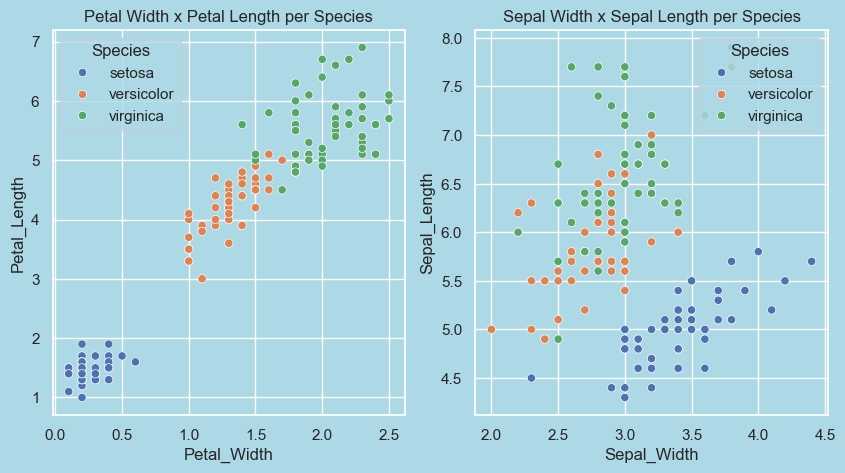

In [114]:
figsize, ax = plt.subplots(1,2,figsize=(10,5))

sns.scatterplot(x=iris["Petal_Width"],y=iris["Petal_Length"],hue=iris["Species"],ax=ax[0])
ax[0].set_title("Petal Width x Petal Length per Species")

sns.scatterplot(x=iris["Sepal_Width"],y=iris["Sepal_Length"],hue=iris["Species"],ax=ax[1])
ax[1].set_title("Sepal Width x Sepal Length per Species")

<b><span style="color:purple">Conclusions</span></b>

The properties that most species can be associated with are by the length and width of the petal. With the sizes of the sepals it is not possible to draw many conclusions mainly for versicolor and virginica, the sepal characteristics of setosa are clearly possible to distinguish.

### Pre-Processing and Machine Learning

<b><span style="color:red">Notes: </span></b>
* I will replace the outliers after separating training and testing with the averages after transforming into NaN with the function below. Replacement after separation is necessary to capture the real means of each group and not the entire dataset
* The values are all on the same scale, it will not be necessary to apply any other transformation
* As we do not have categorical variables, no categorical encoding technique will be necessary.
* I will use the hold out method (0.7 for training, 0.3 for testing)
* As the database is divided equally, it will not be necessary to apply techniques such as oversampling or undersampling

In [6]:
def find_outlier_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_list = []
    
    for value in df[column].values:
        if value > upper or value < lower:
            outliers_list.append(np.nan)
        else:
            outliers_list.append(value)
    
    print("Outliers number detected : {}".format(outliers_list.count(np.nan)))
    return outliers_list

In [7]:
for column in iris.select_dtypes(include=np.number):
    print(f"{column}")
    iris[column] = find_outlier_iqr(iris,column) ; print("-"*40)

Sepal_Length
Outliers number detected : 0
----------------------------------------
Sepal_Width
Outliers number detected : 4
----------------------------------------
Petal_Length
Outliers number detected : 0
----------------------------------------
Petal_Width
Outliers number detected : 0
----------------------------------------


In [57]:
x = iris[['Sepal_Length','Sepal_Width','Petal_Length',	'Petal_Width']]
y = iris['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

x_train['Sepal_Width'].fillna(x_train['Sepal_Width'].mean(),inplace=True)
x_test['Sepal_Width'].fillna(x_test['Sepal_Width'].mean(),inplace=True)

In [52]:
models = {"Logistic Regression": LogisticRegression(),"Decision Tree": DecisionTreeClassifier(), 
          "Random Forest": RandomForestClassifier()}

In [53]:
def cm_func(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True,  cmap="crest", fmt='g', cbar=False)
    plt.xlabel('pred')
    plt.ylabel('true')
    plt.title('Confusion Matrix')
    plt.show()

In [54]:
def fit_model_predicts(x_train, x_test, y_train, y_test, dic):
    for i, model_select in dic.items():
        print(f"\033[1;33;40m Model: {i}\033[0m")
        model = model_select
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        print(accuracy_score(y_test,y_pred))
        print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
        print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
        
        cm_func(y_test,y_pred)
        
        print("-"*60)

 Model: Logistic Regression
1.0
Precision Score :  1.0
Recall Score :  1.0


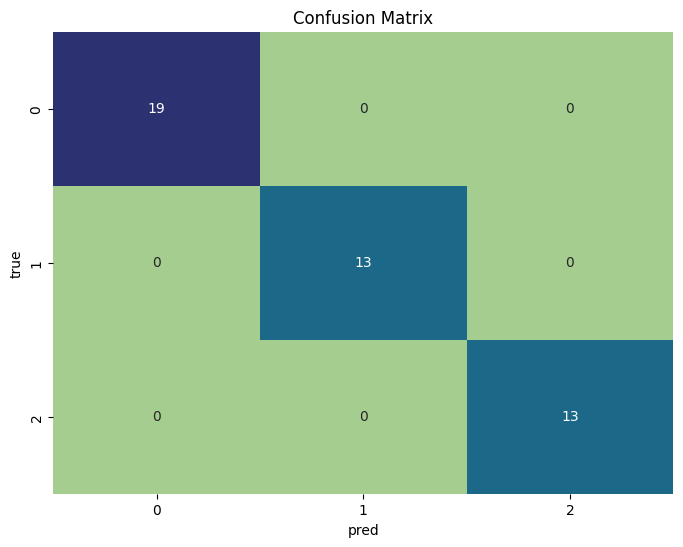

------------------------------------------------------------
 Model: Decision Tree
1.0
Precision Score :  1.0
Recall Score :  1.0


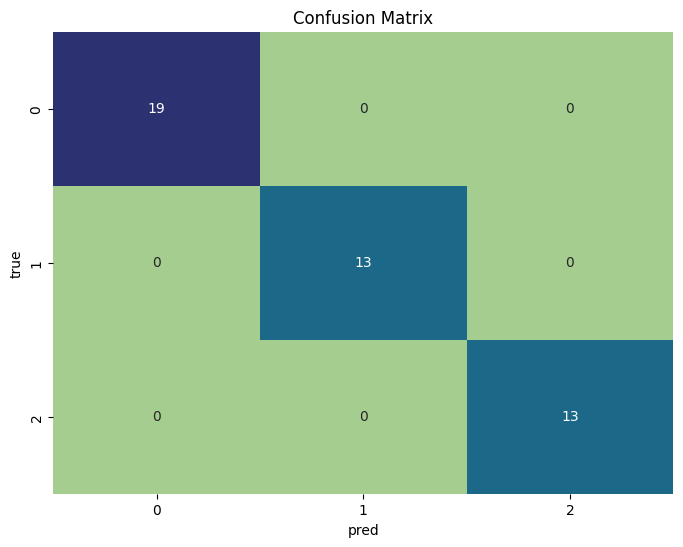

------------------------------------------------------------
 Model: Random Forest
1.0
Precision Score :  1.0
Recall Score :  1.0


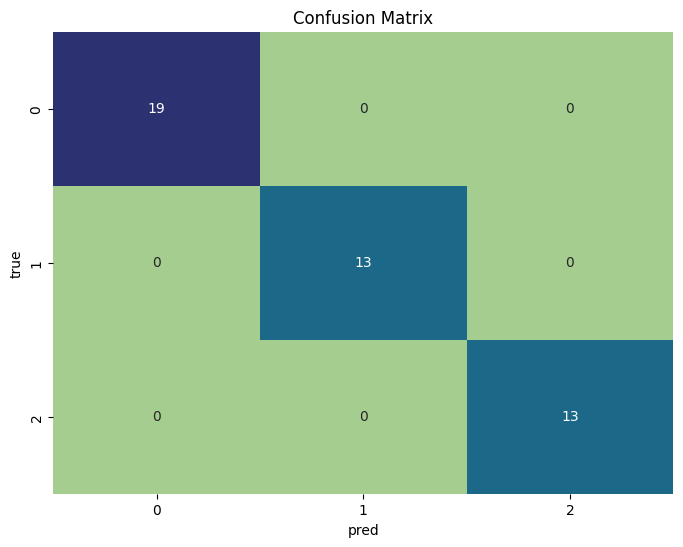

------------------------------------------------------------


In [55]:
fit_model_predicts(x_train, x_test, y_train, y_test, models)

<b><span style="color:purple">Conclusions</span></b><br>
Due to our small database, models can present overfitting and get all predictions correct, i will select the logistic regression model

In [95]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

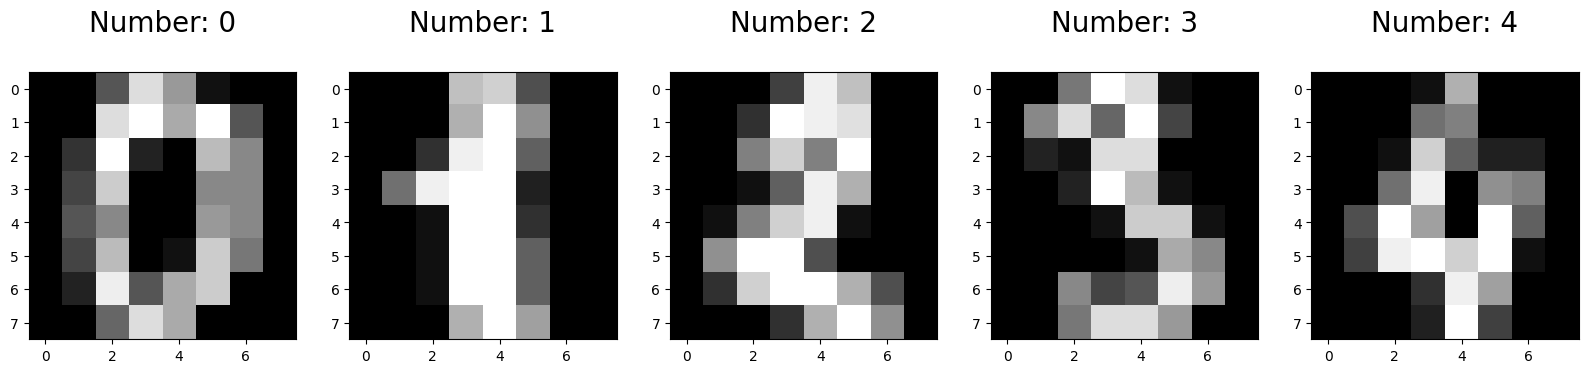

In [110]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Number: %i\n' % label, fontsize=20)

In [113]:
print(digits.data[0:5])
print(digits.target[0:5])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

In [93]:
print(digits.target.argmax())
print(digits.target.argmin())

9
0


In [149]:
print(digits.data.size)
print(digits.data.ndim)
print(digits.data.shape)
print(np.isnan(digits.data).any())
print(digits.data.dtype)
print(digits.target.dtype)

115008
2
(1797, 64)
False
float64
int32


In [151]:
logreg = LogisticRegression()

x = digits.data

y = digits.target

x_train,x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42)

In [153]:
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, pos_label='positive',
                                           average='micro')
recall = recall_score(y_test,y_pred, pos_label='positive',
                                           average='micro')
print(acc,precision,recall)

0.9648148148148148 0.9648148148148148 0.9648148148148148


In [155]:
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 6, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

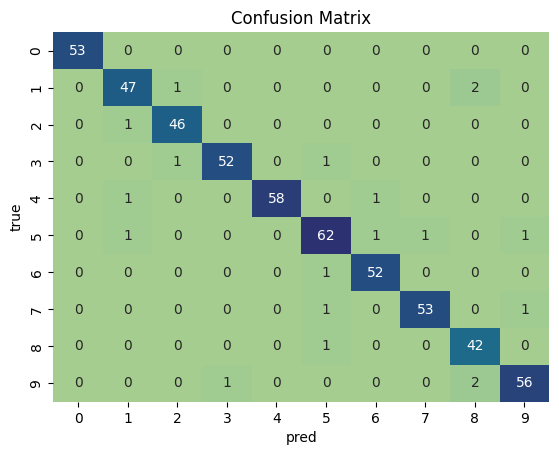

In [158]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  cmap="crest", fmt='g', cbar=False)
plt.xlabel('pred')
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()